In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/a25c1659-e922-4f4e-ad16-cb430ab01e61/newhousing.csv')

In [2]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [3]:
housing.shape

(545, 16)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


### Splitting the data into training and test data:

In [5]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

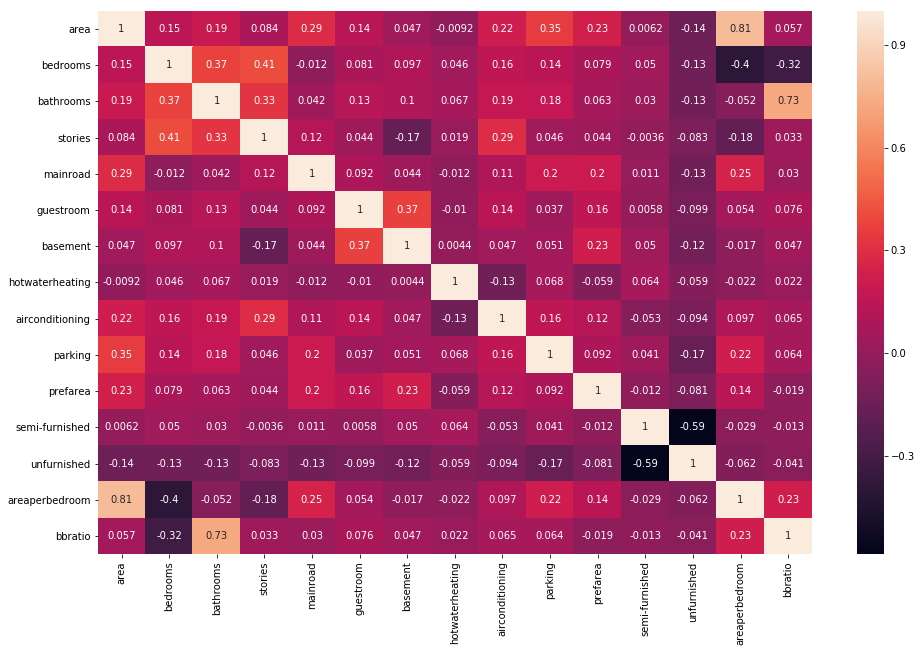

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [7]:
corrmat = np.corrcoef(X.transpose())

In [8]:
p=np.diagflat(corrmat.diagonal())

In [9]:
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.8056104195904634 , min corr:  -0.5884049771343838


In [11]:
corrmat_diag_zero.round(2)

array([[ 0.  ,  0.15,  0.19,  0.08,  0.29,  0.14,  0.05, -0.01,  0.22,
         0.35,  0.23,  0.01, -0.14,  0.81,  0.06],
       [ 0.15,  0.  ,  0.37,  0.41, -0.01,  0.08,  0.1 ,  0.05,  0.16,
         0.14,  0.08,  0.05, -0.13, -0.4 , -0.32],
       [ 0.19,  0.37,  0.  ,  0.33,  0.04,  0.13,  0.1 ,  0.07,  0.19,
         0.18,  0.06,  0.03, -0.13, -0.05,  0.73],
       [ 0.08,  0.41,  0.33,  0.  ,  0.12,  0.04, -0.17,  0.02,  0.29,
         0.05,  0.04, -0.  , -0.08, -0.18,  0.03],
       [ 0.29, -0.01,  0.04,  0.12,  0.  ,  0.09,  0.04, -0.01,  0.11,
         0.2 ,  0.2 ,  0.01, -0.13,  0.25,  0.03],
       [ 0.14,  0.08,  0.13,  0.04,  0.09,  0.  ,  0.37, -0.01,  0.14,
         0.04,  0.16,  0.01, -0.1 ,  0.05,  0.08],
       [ 0.05,  0.1 ,  0.1 , -0.17,  0.04,  0.37,  0.  ,  0.  ,  0.05,
         0.05,  0.23,  0.05, -0.12, -0.02,  0.05],
       [-0.01,  0.05,  0.07,  0.02, -0.01, -0.01,  0.  ,  0.  , -0.13,
         0.07, -0.06,  0.06, -0.06, -0.02,  0.02],
       [ 0.22,  0.16,  0

#### Q1 & Q2:

In [14]:
ij_max = np.unravel_index(
    corrmat_diag_zero.argmax(), corrmat_diag_zero.shape
)
print("ij_max is",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max is (0, 13)
Maximum correlation : 0.8056104195904634


#### Q4

In [15]:
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
#Importing the PCA module
from sklearn.decomposition import PCA

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
Xtrain=X_scaler.transform(X_train) 
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 

Xtest=X_scaler.transform(X_test) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  #

In [25]:
pca = PCA(n_components=6,random_state=100)
pca2 = PCA(n_components=6,random_state=100)

#Scale and transform data to get Principal Components

# add code for question no. 4
# fit_transform and transform to get the reduced data
Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)


regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(Xtrain_reduced, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))


Mean squared error: 0.35
R2 score: 0.65
